# Malignant Comment Classifier Project:

**STATEMENT: The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour. 
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("train.csv") #Reading csv file
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Above is my dataset with malignant feature as my target. Since label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. So clearly it is a **Categorical Problem**.

# Feature Information:
- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
- Highly Malignant: It denotes comments that are highly malignant and hurtful.
- Rude: It denotes comments that are very rude and offensive.
- Threat: It contains indication of the comments that are giving any threat to someone.
- Abuse: It is for comments that are abusive in nature.
- Loathe: It describes the comments which are hateful and loathing in nature.
- ID: It includes unique Ids associated with each comment text given.
- Comment text: This column contains the comments extracted from various social media platforms.

In [3]:
#Checking shape of dataset
df.shape

(159571, 8)

Our training dataset is having 159571 rows and 8 columns.

In [4]:
#Checking all column names
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

Above are the list of column names in the dataset.

In [5]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


There is no null values in the dataset and we can also see the datatypes of each column.

In [6]:
# Lets see how the comments are 
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

By observing these comments we can say that we need to do text processing as there are many words and numbers wich are not important for prediction.

In [8]:
# Checking the percentage of comments that are toxic
df.malignant.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

So more than 90% comments are malignant in nature.

In [9]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = df.iloc[:,2:].sum()

In [10]:
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

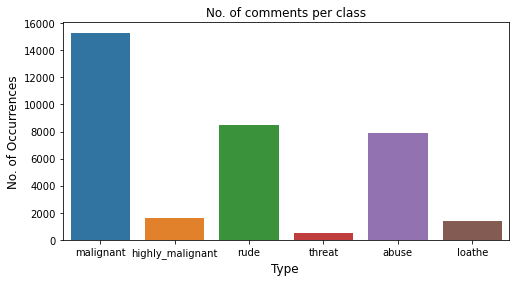

In [11]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
plt.show()

By observing the plot we can say that among all labels the percentage of malignant comments is more.

# Feature Engineering:

In [12]:
# I am creating three different columns length, exclamation and question based on conditions
def feature_engg(df):
    
    df['length'] = df.comment_text.apply(lambda x: len(x))

    df['exclamation'] = df.comment_text.apply(lambda s: len([c for c in s if c == '!']))

    df['question'] = df.comment_text.apply(lambda s: len([c for c in s if c == '?']))

    # Normalization
    for label in ['length','question', 'exclamation']:
        minimum = df[label].min()
        diff = df[label].max() - minimum
        df[label] = df[label].apply(lambda x: (x-minimum) / (diff))

In [13]:
feature_engg(df)
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,exclamation,question
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0.051852,0.000000,0.004785
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0.021421,0.000202,0.000000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0.045646,0.000000,0.000000
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0.123524,0.000000,0.000000
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0.012412,0.000000,0.004785


# Text processing:

In [14]:
#importing required libraries for text processing 
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn

In [15]:
#function for lemmatization
def lemm(text):
    lemmatizer = wordnet.WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, wn.VERB) for word in word_tokens]
    
    return " ".join(lemmas)
#function for removing stopwords    
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return " ".join(filtered_text)

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"yo", "you",text)
    text = re.sub(r"youu", "you",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

Now finally I will make a function to process our comment_text column using above functions.

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def text_proc(df):
    
    df['comment_text'] = df.comment_text.apply(lambda x: x.lower()) #lowering all text
    df['comment_text'] = df.comment_text.apply(lambda x: re.sub(r'\d+','',x)) #removing numbers
    df['comment_text'] = df.comment_text.apply(lambda x: re.sub(r'\n',' ',x)) #removing \n
    df['comment_text'] = df.comment_text.apply(lambda x: decontracted(x))
    df['comment_text'] = df.comment_text.apply(lambda x: lemm(x))
    
    #removing punctuations
    translator = str.maketrans('','', string.punctuation)
    df['comment_text'] = df.comment_text.apply(lambda x : x.translate(translator))
    df['comment_text'] = df.comment_text.apply(lambda x: rem_stopwords(x))
text_proc(df)

In [19]:
#lets have a look at data set now
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,exclamation,question
0,0000997932d777bf,explanation edit make username hardcore metall...,0,0,0,0,0,0,0.051852,0.000000,0.004785
1,000103f0d9cfb60f,daww match background colour seemingly stick t...,0,0,0,0,0,0,0.021421,0.000202,0.000000
2,000113f07ec002fd,hey man really try edit war guy constantly rem...,0,0,0,0,0,0,0.045646,0.000000,0.000000
3,0001b41b1c6bb37e,make real suggestions amprovement wonder secti...,0,0,0,0,0,0,0.123524,0.000000,0.000000
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0.012412,0.000000,0.004785


In [20]:
#checking the value counts of id column
df.id.value_counts()

0000997932d777bf    1
392f4a9354209ec6    1
3925db56b320ccc6    1
392753482da03615    1
3927dd49d646f41f    1
                   ..
8e30b2de937e8de9    1
8e30fd3564ba0b4a    1
8e328798f6397fcc    1
8e34742563534edd    1
fff46fc426af1f9a    1
Name: id, Length: 159571, dtype: int64

As the column id is having unique entries for every row we don't need this column for prediction. So I'm dropping it here itself.

# EDA:

In [21]:
!pip install wordcloud

In [22]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

In [24]:
df_mal = df.loc[:,['id','comment_text','malignant']]

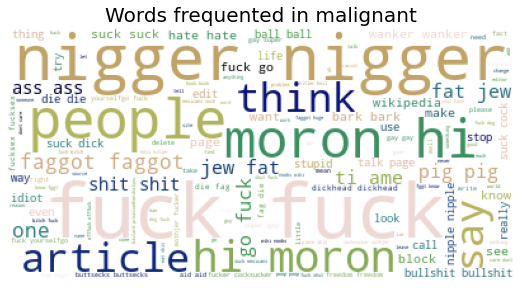

In [25]:
wordcloud(df_mal, 'malignant')

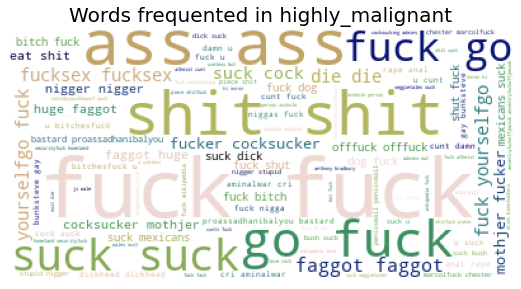

In [26]:
df_Hmal = df.loc[:,['id','comment_text','highly_malignant']]
wordcloud(df_Hmal, 'highly_malignant')

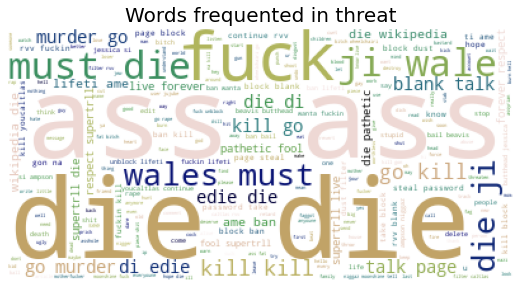

In [27]:
df_thr = df.loc[:,['id','comment_text','threat']]
wordcloud(df_thr, 'threat')

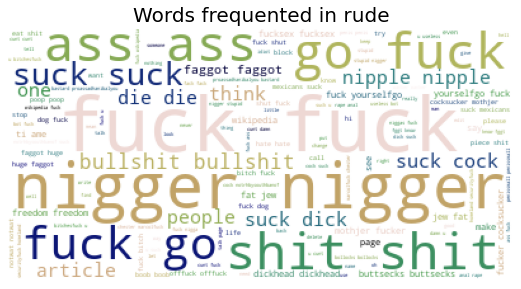

In [28]:
df_rud = df.loc[:,['id','comment_text','rude']]
wordcloud(df_rud, 'rude')

# Model building:

## Here for this perticular project I am using Tfidf vectorizer for our text column to convert text into vectors.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

tfidf = TfidfVectorizer(analyzer='word',max_features=4000)

In [30]:
y = df.drop(columns = ['id','comment_text','length','exclamation','question'])

In [31]:
x = tfidf.fit_transform(df.comment_text)

In [32]:
x

<159571x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 3470136 stored elements in Compressed Sparse Row format>

In [33]:
#lets check the shape of x and y
x.shape, y.shape

((159571, 4000), (159571, 6))

### Lets add remaining features to the X:

In [34]:
length = []
exclamation = []
question = []

for i in df.length:
   length.append([i])
for i in df.exclamation:
   exclamation.append([i])
for i in df.question:
   question.append([i])

In [35]:
import scipy as sp
X = sp.sparse.hstack((x, length, exclamation, question))

In [36]:
X.shape, y.shape

((159571, 4003), (159571, 6))

# Spliting data into train and test sets:

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [38]:
!pip install wheel

In [39]:
!pip install lightgbm

In [40]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier

In [41]:
#lets define different algorithms
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [42]:
#function for printing score
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [43]:
#models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,sgd,lgb]:
   clf = OneVsRestClassifier(classifier)
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_test)
   print_score(y_pred, classifier)

classifier: LinearSVC
Jaccard score: 0.5457426147398549
Accuracy score: 0.9195848895796255
f1_score: 0.7061235286337786
Precision :  0.8494828957836118
Recall: 0.6041643091546905
Hamming loss:  0.018566331603706583
Confusion matrix:
  [[[35696   382]
  [ 1271  2544]]

 [[39420    67]
  [  305   101]]

 [[37590   160]
  [  694  1449]]

 [[39769    19]
  [   82    23]]

 [[37610   272]
  [  869  1142]]

 [[39490    46]
  [  277    80]]]

classifier: LogisticRegression
Jaccard score: 0.522853258027403
Accuracy score: 0.9199107612864412
f1_score: 0.6866758241758243
Precision :  0.8734929232919797
Recall: 0.5656897137037457
Hamming loss:  0.019059317006325252
Confusion matrix:
  [[[35821   257]
  [ 1429  2386]]

 [[39416    71]
  [  288   118]]

 [[37620   130]
  [  774  1369]]

 [[39781     7]
  [   92    13]]

 [[37650   232]
  [  959  1052]]

 [[39509    27]
  [  296    61]]]

classifier: MultinomialNB
Jaccard score: 0.4387179214141199
Accuracy score: 0.9130674554433108
f1_score: 0.60987

# Hyperparameter Tuning:

In [44]:
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [45]:
#train the model with given parameters using GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,param,cv = 3, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=-1,
             param_grid={'estimator__C': [2], 'estimator__dual': [False],
                         'estimator__intercept_scaling': [2, 4, 5],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1']})

In [46]:
#printing the best parameters found by GridSearchCV
GCV.best_params_

{'estimator__C': 2,
 'estimator__dual': False,
 'estimator__intercept_scaling': 2,
 'estimator__loss': 'squared_hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l1'}

## Final Model:

In [47]:
model = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='squared_hinge',multi_class='ovr', penalty ='l1',intercept_scaling=2))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Jaccard score: 0.5497861942577886
Accuracy score: 0.9197603589602186
f1_score: 0.7094994087504928
Precision :  0.845732184808144
Recall: 0.6110671042208894
Hamming loss:  0.018474419071014964

Confusion matrix: 
 [[[35684   394]
  [ 1246  2569]]

 [[39412    75]
  [  295   111]]

 [[37586   164]
  [  682  1461]]

 [[39762    26]
  [   76    29]]

 [[37605   277]
  [  871  1140]]

 [[39487    49]
  [  267    90]]]


In [48]:
model.predict(X)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Model Saving:

In [49]:
import joblib
joblib.dump(model,"Malignant_comment.pkl")

['Malignant_comment.pkl']

In [50]:
#loading the model
model = joblib.load('Malignant_comment.pkl')

# Prediction for test dataset using final model:

In [51]:
#Lets load the test data set
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [52]:
#feature engineering
feature_engg(test) 
test.head()

,id,comment_text,length,exclamation,question
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.073215,0.0,0.0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.009802,0.0,0.0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.010602,0.0,0.0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.040808,0.0,0.0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.008002,0.0,0.0


In [53]:
#processing the test data set
text_proc(test)   

test.head()

,id,comment_text,length,exclamation,question
0,00001cee341fdb12,bitch ja rule succesful ever whats hat sad mof...,0.073215,0.0,0.0
1,0000247867823ef7,rfc title fine amo,0.009802,0.0,0.0
2,00013b17ad220c46,source zawe ashton lapland —,0.010602,0.0,0.0
3,00017563c3f7919a,look back source information update correct fo...,0.040808,0.0,0.0
4,00017695ad8997eb,anonymously edit article,0.008002,0.0,0.0


In [54]:
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
X = tfidf.fit_transform(test.comment_text)

In [55]:
length = []
exclamation = []
question = []
source = []
for i in test.length:
   length.append([i])
for i in test.exclamation:
   exclamation.append([i])
for i in test.question:
   question.append([i])

import scipy as sp
X_test = sp.sparse.hstack((X, length, exclamation, question))

In [56]:
#lets predict the output
model.predict(X_test)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [57]:
predictions = model.predict(X_test)

In [58]:
pred=pd.DataFrame(predictions, columns = ['malignant','highly_malignant','rude','threat','abuse','loathe'])
pred

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,1,0,0,0


In [59]:
x_test = pd.concat([test,pred], axis=1)
x_test

,id,comment_text,length,exclamation,question,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,bitch ja rule succesful ever whats hat sad mof...,0.073215,0.0,0.000000,0,0,0,0,0,0
1,0000247867823ef7,rfc title fine amo,0.009802,0.0,0.000000,0,0,0,0,0,0
2,00013b17ad220c46,source zawe ashton lapland —,0.010602,0.0,0.000000,0,0,0,0,0,0
3,00017563c3f7919a,look back source information update correct fo...,0.040808,0.0,0.000000,0,0,0,0,0,0
4,00017695ad8997eb,anonymously edit article,0.008002,0.0,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing toolongcrap,0.011802,0.0,0.000000,0,0,0,0,0,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throw cut ma...,0.039408,0.0,0.001736,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,okinotorishi ama categories see change agree c...,0.084417,0.0,0.000868,0,0,0,0,0,0
153162,fffe8f1340a79fc2,one found nations eu germany law return quite ...,0.100220,0.0,0.000868,0,0,1,0,0,0


In [60]:
#saving the data into csv file
x_test.to_csv(r"D:\Internship\Project 6\Malignant Comments Classifier Project\test_predictions.csv")